In [10]:
from os import path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.ndimage import convolve
from skimage.transform import resize

import tsahelper.tsahelper as tsa

from src import config
from src.utils import get_labels, plot_image, animate_scan, get_random_subject_id, plot_line, plot_crop_boundaries, moving_average
from src.crop import crop_dims, hard_crop

In [2]:
import torch

In [3]:
labels = get_labels()

In [4]:
subject_id = get_random_subject_id(labels)
image = tsa.read_data(path.join(config.path_a3d, subject_id + '.a3d'))
image = image.transpose(2, 0, 1)
image = tsa.convert_to_grayscale(image)

In [5]:
convolved = convolve(image, np.ones((2, 2, 2)))
filtered = (convolved * (convolved > 250))

s0 = filtered.sum(axis=1).sum(axis=1)
s1 = filtered.sum(axis=0).sum(axis=1)
s2 = filtered.sum(axis=0).sum(axis=0)

In [18]:
bottom, top = find_edges(s0)
left, right = find_edges(s1)
front, back = find_edges(s2)

In [19]:
cd = crop_dims(image.shape, top, bottom, left, right, front, back)

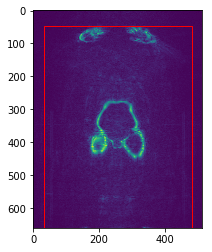

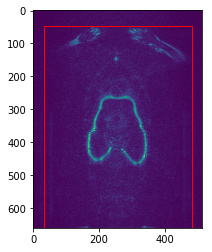

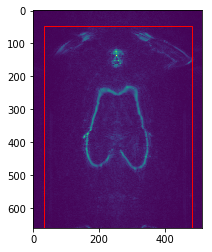

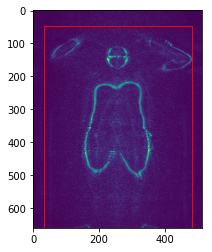

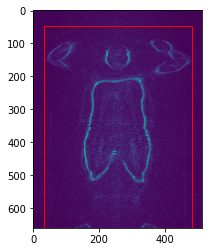

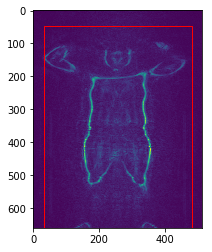

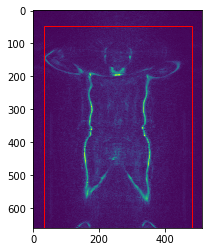

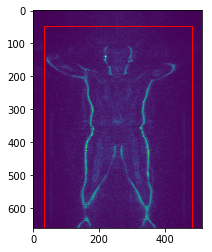

In [25]:
height = image.shape[0]
for xc in range (220, 300, 10):
    plot_crop_boundaries(image[:, :, xc], cd)